In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("LeaderIDsFinal.xlsx",sheet_name="Журналисты")

In [4]:
data.head()

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность
0,Дмитрий Киселев,103060.0,228000.0,2385.0,76058.0,1954.0,9.0,3.0
1,Константин Генич,25200.0,184000.0,71300.0,109091.0,1978.0,9.0,3.0
2,Дмитрий Губерниев,63963.0,1480000.0,719800.0,138889.0,1974.0,9.0,3.0
3,Василий Уткин,12917.0,255000.0,834000.0,139000.0,1972.0,9.0,3.0
4,Алексей Венедиктов,87603.0,191000.0,107000.0,198413.0,1955.0,9.0,3.0


In [5]:
from sklearn.preprocessing import StandardScaler
features=['запросов в месяц', 'количество страниц в google', 'подписчики',
       'доходы за год $']
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

Стандартизируем шкалу

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
principalDf

,principal_component_1,principal_component_2
0,-1.064837,0.178281
1,-1.111017,0.085728
2,-0.211344,0.475477
3,-0.984159,0.002320
4,-1.037119,0.105674
5,-0.926226,0.189092
6,-0.896485,-0.179972
7,-0.288496,0.098293
8,2.202070,3.185503
9,-0.750136,-0.266350


Применим анализ главных компонент


In [7]:
pca.explained_variance_ratio_.sum()

0.8455541604943505

Проверим рейтинг изменчивости

In [8]:
data.index=range(0,18)

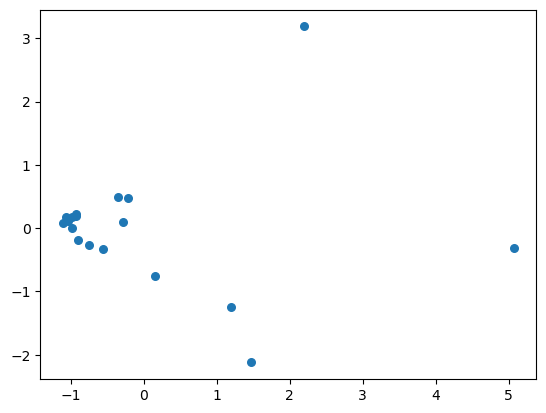

In [9]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
principalDf["Group"]= y_kmeans
data["Group"]=y_kmeans

Применим алгоритм k-means, чтобы разделить наблюдения на группы

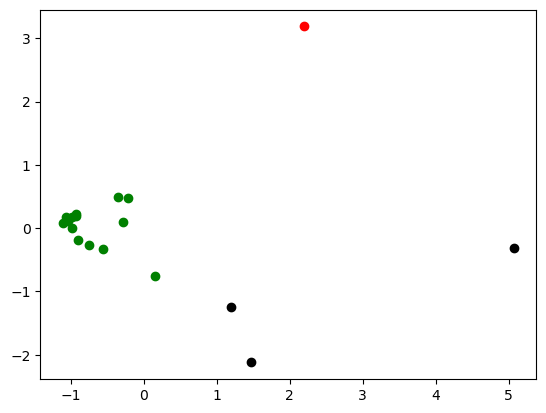

In [11]:
plt.scatter(principalDf[principalDf.Group == 2].iloc[:,0],principalDf[principalDf.Group == 2].iloc[:,1] , color = 'red')
plt.scatter(principalDf[principalDf.Group == 1].iloc[:,0],principalDf[principalDf.Group == 1].iloc[:,1] , color = 'black')
plt.scatter(principalDf[principalDf.Group == 0].iloc[:,0],principalDf[principalDf.Group == 0].iloc[:,1] , color = 'green')

plt.show()


In [12]:
principalDf[principalDf.Group == 1]
writer = pd.ExcelWriter('JournalistFinal.xlsx')
data.to_excel(writer)
writer.save()

Запишем файл журналистов

In [13]:
data=pd.read_excel("LeaderIDsFinal.xlsx",sheet_name="Блогеры")
data=data.loc[data["доходы за год $"].isna()==False]


Повторим процедуру с Блогерами

In [14]:
data

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность
0,Диана Астер,18126.0,71000.0,13984535,23809.0,2000.0,11.0,2.0
1,Анна Покровская (Покров),137034.0,347000.0,26718000,31746.0,1999.0,11.0,2.0
2,Даня Милохин,705459.0,4200000.0,24370778,47453.0,2001.0,11.0,2.0
3,Валентина Карнаухова (Карнавал),946882.0,638000.0,27394000,53075.0,2001.0,11.0,2.0
4,Юлия Гаврилина,356552.0,522000.0,38388000,54894.0,2002.0,11.0,2.0
5,Егор Шип,245286.0,1460000.0,15829700,60000.0,2002.0,11.0,2.0
6,Евге́ний Баже́нов (бэдкомедиан),31248.0,1320000.0,6454000,79365.0,1991.0,11.0,2.0
7,Дина Саева,50935.0,127000.0,32639400,81018.0,1999.0,11.0,2.0
8,Катя Адушкина,106532.0,359000.0,14878872,90000.0,2003.0,11.0,2.0
9,Рахим Абрамов,4649.0,78000.0,20873000,171958.0,1998.0,11.0,2.0


In [15]:
features=['запросов в месяц', 'количество страниц в google', 'подписчики',
       'доходы за год $']
data1=data[features].astype(int)
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
pca.explained_variance_ratio_.sum()

0.6935677522870813

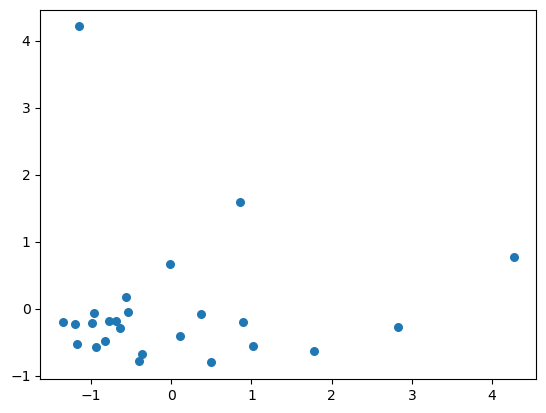

In [17]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

Тяжело понять, какое оптимальное число кластеров

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


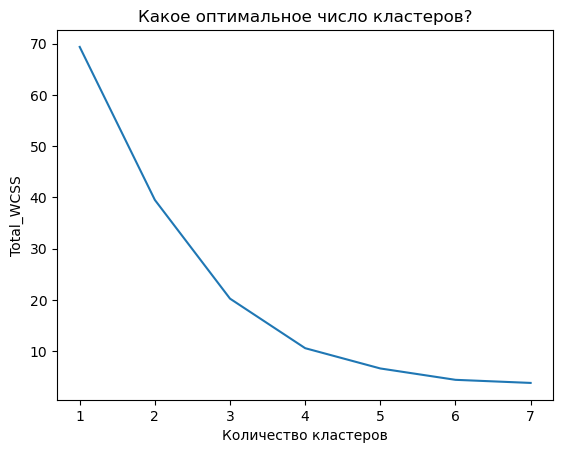

In [18]:
# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 8

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(principalDf)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('Какое оптимальное число кластеров?')
plt.xlabel('Количество кластеров')
plt.ylabel('Total_WCSS')
plt.show()


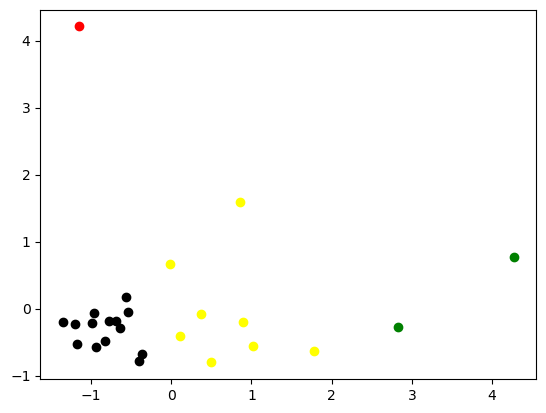

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
principalDf["Group"]= y_kmeans
data["Group"]=y_kmeans
plt.scatter(principalDf[principalDf.Group == 2].iloc[:,0],principalDf[principalDf.Group == 2].iloc[:,1] , color = 'red')
plt.scatter(principalDf[principalDf.Group == 1].iloc[:,0],principalDf[principalDf.Group == 1].iloc[:,1] , color = 'black')
plt.scatter(principalDf[principalDf.Group == 0].iloc[:,0],principalDf[principalDf.Group == 0].iloc[:,1] , color = 'green')
plt.scatter(principalDf[principalDf.Group == 3].iloc[:,0],principalDf[principalDf.Group == 3].iloc[:,1] , color = 'yellow')
plt.show()

In [20]:
writer = pd.ExcelWriter('BlogersFinal.xlsx')
data.to_excel(writer)
writer.save()

Сохраним блогеров (позже мы изменили названия этого и другого файла, если что)

In [328]:
data=pd.read_excel("LeaderIDsFinal.xlsx",sheet_name="Музыканты")
data=data.loc[data["доходы за год $"].isna()==False]
data.head()

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность
0,Little big (Илья прусикин),149313.0,564000.0,13148000,1000000.0,1985.0,11.0,5.0
1,Сергей Лазарев,415282.0,1160000.0,5942000,1200000.0,1983.0,9.0,5.0
2,Оксимирон,522102.0,1750000.0,2496000,1400000.0,1985.0,11.0,5.0
3,Элджей,496232.0,1930000.0,5785450,2000000.0,1994.0,11.0,5.0
4,Слава Марлоу,71507.0,1220000.0,9280000,2000000.0,1999.0,11.0,5.0


Перейдем к музыкантам

In [329]:
features=['запросов в месяц', 'количество страниц в google', 'подписчики',
       'доходы за год $']
data1=data[features].astype(int)
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [330]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
pca.explained_variance_ratio_.sum()

0.779019403155889

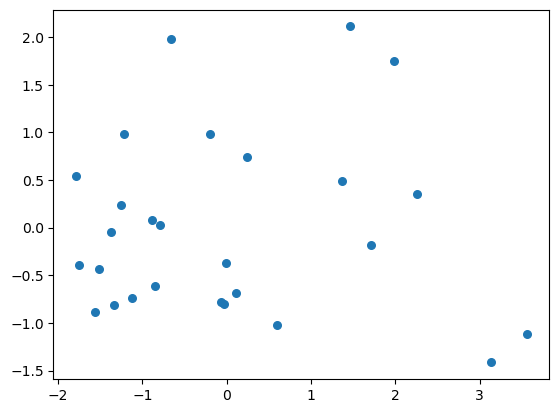

In [331]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


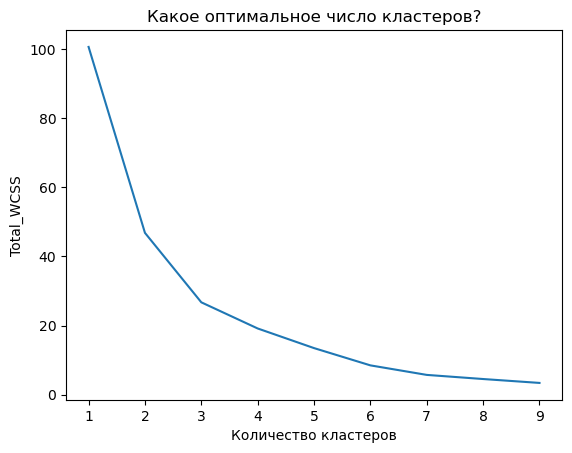

In [376]:
# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 10

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(principalDf)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('Какое оптимальное число кластеров?')
plt.xlabel('Количество кластеров')
plt.ylabel('Total_WCSS')
plt.show()


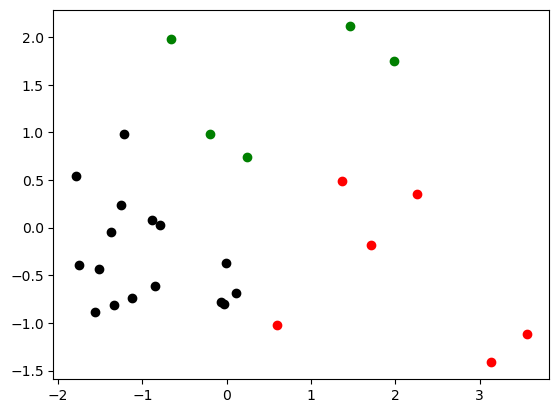

In [378]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
principalDf["Group"]= y_kmeans
data["Group"]=y_kmeans
plt.scatter(principalDf[principalDf.Group == 2].iloc[:,0],principalDf[principalDf.Group == 2].iloc[:,1] , color = 'red')
plt.scatter(principalDf[principalDf.Group == 1].iloc[:,0],principalDf[principalDf.Group == 1].iloc[:,1] , color = 'black')
plt.scatter(principalDf[principalDf.Group == 0].iloc[:,0],principalDf[principalDf.Group == 0].iloc[:,1] , color = 'green')
#plt.scatter(principalDf[principalDf.Group == 3].iloc[:,0],principalDf[principalDf.Group == 3].iloc[:,1] , color = 'yellow')
plt.show()

In [381]:
principalDf[principalDf.Group == 2]
#data.iloc[[17,19,21,22,23]]

,principal_component_1,principal_component_2,Group
9,0.599239,-1.022335,2
11,3.139505,-1.415671,2
14,1.715590,-0.177058,2
15,3.562534,-1.121381,2
18,1.366443,0.486318,2
20,2.257343,0.351106,2


In [27]:
writer = pd.ExcelWriter('MusicFinal.xlsx')
data.to_excel(writer)
writer.save()

Сохраним музыкантов

In [28]:
data=pd.read_excel("LeaderIDsFinal.xlsx",sheet_name="Телевидение")
data=data.loc[data["доходы за год $"].isna()==False]
data.head()

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность
0,Дмитрий Дьяченко,4253.0,103000.0,2562,1548054.0,1972.0,9.0,9.0
1,Алексей Герман,7421.0,118000.0,0,3100580.0,1938.0,9.0,9.0
2,Андрей Кравчук,8110.0,195000.0,1516,1997555.0,1962.0,9.0,9.0
3,Гурам Амарян,24151.0,257000.0,309200,617028.0,1993.0,11.0,9.0
4,Тимур Бекмамбетов,33037.0,203000.0,144000,2062007.0,1961.0,9.0,9.0


Перейдем к телеведушим

In [29]:
features=['запросов в месяц', 'количество страниц в google', 'подписчики',
       'доходы за год $']
data1=data[features].astype(int)
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
pca.explained_variance_ratio_.sum()

0.7073882643801579

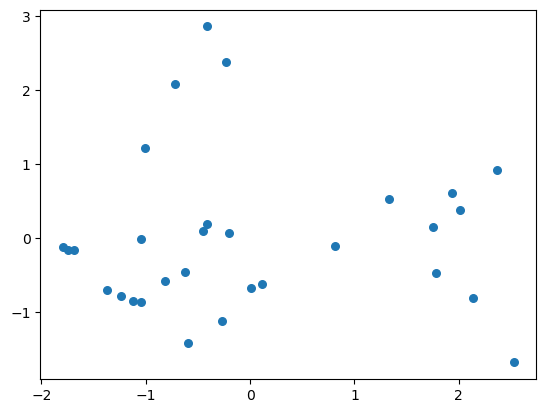

In [31]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


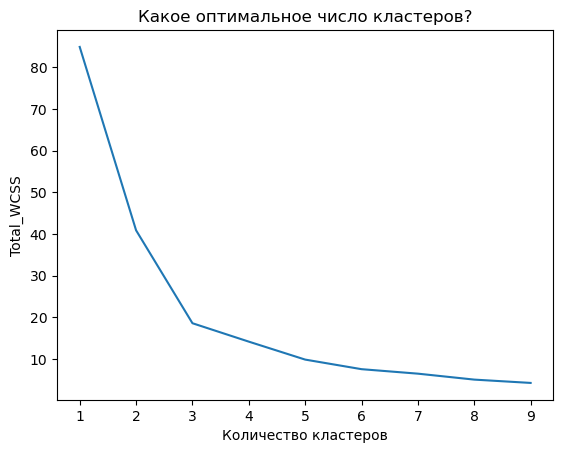

In [32]:
# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 10

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(principalDf)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('Какое оптимальное число кластеров?')
plt.xlabel('Количество кластеров')
plt.ylabel('Total_WCSS')
plt.show()


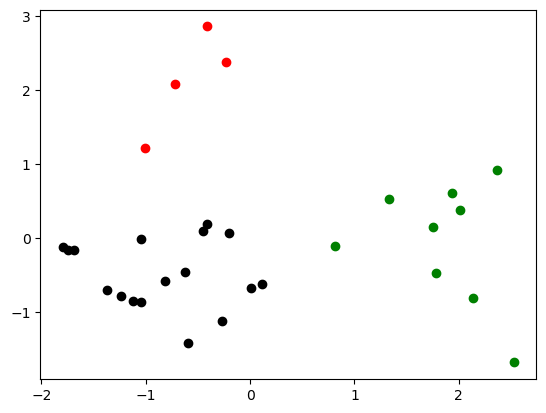

In [33]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
principalDf["Group"]= y_kmeans
data["Group"]=y_kmeans
plt.scatter(principalDf[principalDf.Group == 2].iloc[:,0],principalDf[principalDf.Group == 2].iloc[:,1] , color = 'red')
plt.scatter(principalDf[principalDf.Group == 1].iloc[:,0],principalDf[principalDf.Group == 1].iloc[:,1] , color = 'black')
plt.scatter(principalDf[principalDf.Group == 0].iloc[:,0],principalDf[principalDf.Group == 0].iloc[:,1] , color = 'green')
#plt.scatter(principalDf[principalDf.Group == 3].iloc[:,0],principalDf[principalDf.Group == 3].iloc[:,1] , color = 'yellow')
plt.show()

In [34]:
writer = pd.ExcelWriter('TVFinal.xlsx')
data.to_excel(writer)
writer.save()

Сохраним телеведущих

In [204]:
data=pd.read_excel("LeaderIDsFinal.xlsx",sheet_name="Dataset")
data=data.loc[data["доходы за год $"].isna()==False]
data.index=range(0,132)

Поработаем с общим датасетом. Найдем место каждого популярного человека  в топе

In [205]:
features=['запросов в месяц', 'количество страниц в google', 'подписчики',
       'доходы за год $']
data1=data[features].astype(int)
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [206]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
pca.explained_variance_ratio_.sum()

0.7276098618993456

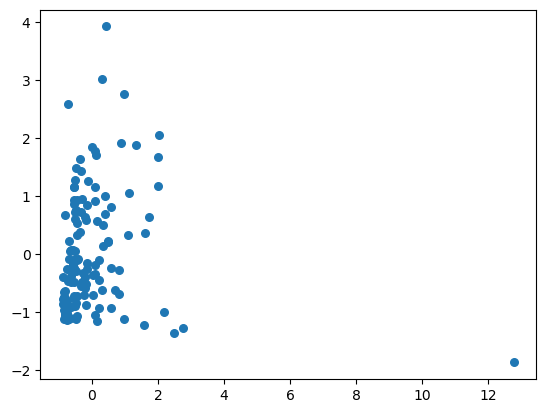

In [207]:
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

Есть одна обособленная точка - Владимир Путин. Из-за нее такой маленькиц рейтинг изменчивости от PCA(72%) и сложно провести k-means

Поэтому я удалил ее с графика и дал ей отдельную категорию - у путина в 7 раз больше запросов в интернете чем у других. Он лидер общественного мнения, и очевидно, топ 1 рейтинга, с такими параметрами

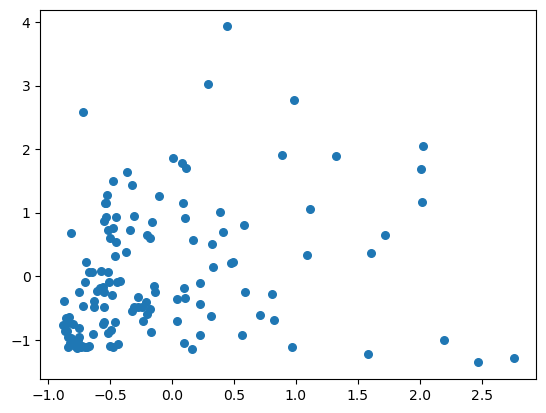

In [208]:
data1=data[data.index!=78]
principalDf=principalDf[principalDf.index!=78]
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], s = 30);
plt.show()

Мы получили график со всеми наблюдениями. Оси - значения по главным компонентам

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


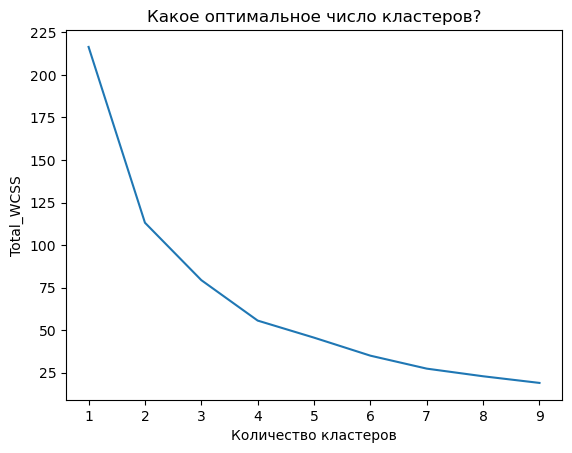

In [209]:
# определяем необходимое количество кластеров
total_wcss=[]
n_clusters = 10

for i in range(1,n_clusters): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(principalDf)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('Какое оптимальное число кластеров?')
plt.xlabel('Количество кластеров')
plt.ylabel('Total_WCSS')
plt.show()


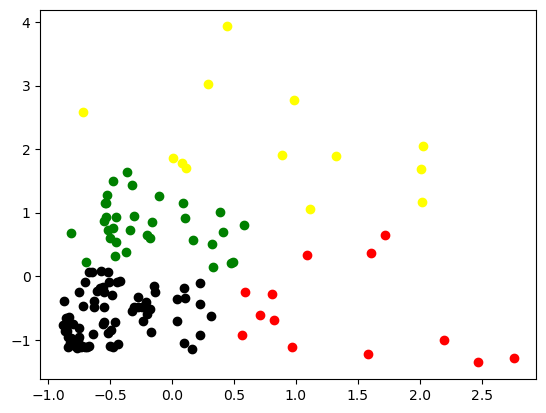

In [237]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
principalDf["Group"]= y_kmeans
y_kmeans=list(y_kmeans[:78])+[4]+list(y_kmeans[78:])
data["Group"]=y_kmeans
plt.scatter(principalDf[principalDf.Group == 2].iloc[:,0],principalDf[principalDf.Group == 2].iloc[:,1] , color = 'red')
plt.scatter(principalDf[principalDf.Group == 0].iloc[:,0],principalDf[principalDf.Group == 0].iloc[:,1] , color = 'black')
plt.scatter(principalDf[principalDf.Group == 1].iloc[:,0],principalDf[principalDf.Group == 1].iloc[:,1] , color = 'green')
plt.scatter(principalDf[principalDf.Group == 3].iloc[:,0],principalDf[principalDf.Group == 3].iloc[:,1] , color = 'yellow')
plt.show()
principalDf.index=range(0,131)


In [239]:
principalDf[principalDf.Group == 3]

,principal_component_1,principal_component_2,Group
6,2.013770,1.170039,3
9,-0.719634,2.587988,3
12,0.292594,3.023659,3
15,0.114690,1.708218,3
46,0.079136,1.773563,3
52,0.883876,1.913465,3
56,1.111743,1.051602,3
58,0.982897,2.767016,3
63,2.006996,1.680865,3
70,2.022609,2.054173,3


Самые популярные наблюдения. Кто же эти люди?

In [240]:
#data.iloc[[12,52,56,58,63,70,73,95]]
data.iloc[[6,12,15,46,52,56,58,63,70,73,92,95]]# тут исправили 94 на 95, тк после путина (номер 78), индексы немного сбились

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность,Unnamed: 8,Unnamed: 9,Group
6,Ивлеева,2219493.0,2720000.0,30196000,2700000.0,1991.0,11.0,2.0,NaN,NaN,3
12,Владислав Бумага,335235.0,1240000.0,61772387,1238432.0,1996.0,11.0,2.0,NaN,NaN,3
15,Литвин,207715.0,2200000.0,25079500,5357169.0,1999.0,11.0,2.0,NaN,NaN,3
46,Ирина Шейк,182300.0,2310000.0,20200000,6900000.0,1986.0,11.0,4.0,NaN,NaN,3
52,Шнуров,982511.0,3150000.0,8222000,11000000.0,1973.0,11.0,5.0,NaN,NaN,3
56,Баста,930205.0,4020000.0,11249000,6600000.0,1980.0,9.0,5.0,NaN,NaN,3
58,Тимати,385702.0,4810000.0,22989600,10400000.0,1983.0,11.0,5.0,NaN,NaN,3
63,Ольга Бузова,1003826.0,6230000.0,33920000,3300000.0,1986.0,9.0,5.0,NaN,NaN,3
70,Егор крид,1732206.0,4070000.0,34600000,5000000.0,1994.0,11.0,5.0,NaN,NaN,3
73,Алишер Моргенштерн,1221602.0,3540000.0,21970973,7400000.0,1998.0,11.0,5.0,NaN,NaN,3


In [250]:
data.head()

,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность,Group
0,Артемий Лебедев,155614.0,394000.0,3543464,85979.0,1975.0,11.0,1.0,0
1,Герман Греф,93197.0,1270000.0,0,11000000.0,1984.0,12.0,1.0,1
2,Давидыч,47817.0,270000.0,8732000,510000.0,1981.0,11.0,2.0,0
3,Дмитрий Куплинов,391818.0,875000.0,17100000,2903106.0,1988.0,11.0,2.0,1
4,Максим Голополосов (+100 500),44332.0,712000.0,12690990,700000.0,1989.0,11.0,2.0,0


In [251]:
writer = pd.ExcelWriter('DatasetFinal.xlsx')
data.to_excel(writer)
writer.save()

Запишем файл с топом личностей

In [420]:
a=pd.read_excel("DatasetFinal.xlsx")
#a=a.loc[a["доходы за год $"].isna()==False]
b=a.groupby("Деятельность",as_index=False).agg({"доходы за год $":"median"})
b["Деятельность"]=["Бизнесмен","Блогер","Журналист","Модель","Музыкант","Политика","Спортсмен","Телеведущий"]
a

,Unnamed: 0,имя,запросов в месяц,количество страниц в google,подписчики,доходы за год $,год рождения,основная платформа деятельности,Деятельность,Group
0,0,Артемий Лебедев,155614,394000,3543464,85979,1975,11,1,0
1,1,Герман Греф,93197,1270000,0,11000000,1984,12,1,1
2,2,Давидыч,47817,270000,8732000,510000,1981,11,2,0
3,3,Дмитрий Куплинов,391818,875000,17100000,2903106,1988,11,2,1
4,4,Максим Голополосов (+100 500),44332,712000,12690990,700000,1989,11,2,0
...,...,...,...,...,...,...,...,...,...,...
127,127,Дмитрий Борисов,41906,231000,180000,512568,1985,9,9,0
128,128,Алексей Щербаков,103902,3860000,6070900,595241,1988,11,9,0
129,129,Александр Петров,201894,1390000,3249000,1700000,1989,9,9,0
130,130,Нурлан сабуров,192636,3410000,1425900,603882,1991,11,9,0


Попробуем нарисовать пару интересных графиков

AttributeError: 'FacetGrid' object has no attribute 'title'

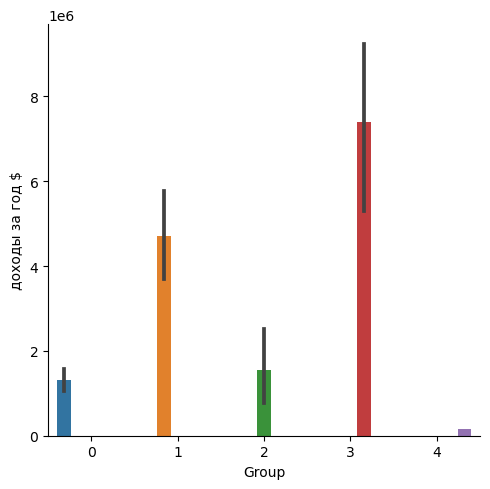

In [439]:

g=sns.catplot(data=a, kind="bar", x="Group", y="доходы за год $", hue="Group")
g.set_titles("Доходы по категории")

<AxesSubplot:>

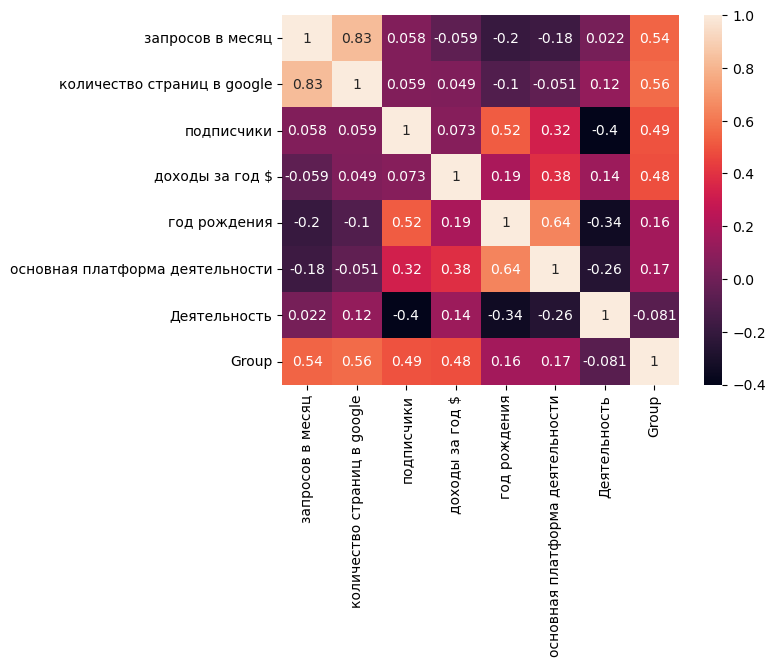

In [454]:
sns.heatmap(a[['запросов в месяц', 'количество страниц в google',
       'подписчики', 'доходы за год $','год рождения','основная платформа деятельности','Деятельность', 'Group']].corr(), annot=True)